In [1]:
# initial imports
import os
import torch
import torchvision
import tarfile
import matplotlib
import matplotlib.pyplot as plt
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torch import nn
import torch.nn.functional as F

In [68]:
# specifies dataset location (downloaded from kaggle)
data_dir = 'fruits-360'

# lists all files in dataset
print(os.listdir(data_dir))

# stores all categories of fruits and vegtables in the dataset under the training folder
classes = os.listdir(data_dir + "/Training")

# prints list of all categories
print(classes)

['LICENSE', 'Test', 'papers', 'Training', 'readme.md', 'test-multiple_fruits']
['Tomato 4', 'Apple Red Delicious', 'Tomato 3', 'Huckleberry', 'Blueberry', 'Pear Red', 'Banana Lady Finger', 'Melon Piel de Sapo', 'Pear', 'Cherry 1', 'Strawberry', 'Nut Forest', 'Avocado', 'Tomato 2', 'Pomegranate', 'Dates', 'Carambula', 'Potato Red Washed', 'Granadilla', 'Kohlrabi', 'Tamarillo', 'Pepper Red', 'Fig', 'Ginger Root', 'Kiwi', 'Cherry Wax Yellow', 'Lemon', 'Guava', 'Apple Golden 2', 'Pear Stone', 'Apple Red 1', 'Cauliflower', 'Mandarine', 'Quince', 'Strawberry Wedge', 'Pear Monster', 'Raspberry', 'Pitahaya Red', 'Nut Pecan', 'Apple Golden 3', 'Redcurrant', 'Apple Red Yellow 1', 'Pepper Yellow', 'Grape Pink', 'Banana Red', 'Cucumber Ripe 2', 'Physalis', 'Cherry Rainier', 'Maracuja', 'Chestnut', 'Plum', 'Potato Sweet', 'Cucumber Ripe', 'Hazelnut', 'Nectarine', 'Cherry Wax Black', 'Cantaloupe 2', 'Lychee', 'Pepper Orange', 'Clementine', 'Watermelon', 'Pear Kaiser', 'Mangostan', 'Cherry 2', 'Pinea

In [70]:
# stores all images of strawberries in the dataset
strawberry_imgs = os.listdir(data_dir + "/Training/Strawberry")

# prints number of strawberry images
print('No. of training images for strawberries:', len(strawberry_imgs))

# prints names of first 5 files containing images of strawberries
print(strawberry_imgs[:5])

No. of training images for strawberries: 492
['r_236_100.jpg', '247_100.jpg', 'r_226_100.jpg', '257_100.jpg', 'r_150_100.jpg']


In [71]:
# initializes a dictionary to store the number of images in each category under the training folder
train_image_count = {}
for item in classes:
    train_image_count[item] = 0
    
# prints dictionary
train_image_count

{'Tomato 4': 0,
 'Apple Red Delicious': 0,
 'Tomato 3': 0,
 'Huckleberry': 0,
 'Blueberry': 0,
 'Pear Red': 0,
 'Banana Lady Finger': 0,
 'Melon Piel de Sapo': 0,
 'Pear': 0,
 'Cherry 1': 0,
 'Strawberry': 0,
 'Nut Forest': 0,
 'Avocado': 0,
 'Tomato 2': 0,
 'Pomegranate': 0,
 'Dates': 0,
 'Carambula': 0,
 'Potato Red Washed': 0,
 'Granadilla': 0,
 'Kohlrabi': 0,
 'Tamarillo': 0,
 'Pepper Red': 0,
 'Fig': 0,
 'Ginger Root': 0,
 'Kiwi': 0,
 'Cherry Wax Yellow': 0,
 'Lemon': 0,
 'Guava': 0,
 'Apple Golden 2': 0,
 'Pear Stone': 0,
 'Apple Red 1': 0,
 'Cauliflower': 0,
 'Mandarine': 0,
 'Quince': 0,
 'Strawberry Wedge': 0,
 'Pear Monster': 0,
 'Raspberry': 0,
 'Pitahaya Red': 0,
 'Nut Pecan': 0,
 'Apple Golden 3': 0,
 'Redcurrant': 0,
 'Apple Red Yellow 1': 0,
 'Pepper Yellow': 0,
 'Grape Pink': 0,
 'Banana Red': 0,
 'Cucumber Ripe 2': 0,
 'Physalis': 0,
 'Cherry Rainier': 0,
 'Maracuja': 0,
 'Chestnut': 0,
 'Plum': 0,
 'Potato Sweet': 0,
 'Cucumber Ripe': 0,
 'Hazelnut': 0,
 'Nectarine': 

In [72]:
# updates the dictionary with the correct number of images in each category
for item in classes:
    train_image_count[item] = len( os.listdir(data_dir + "/Training/"+item))

In [73]:
# prints dictionary
train_image_count

{'Tomato 4': 479,
 'Apple Red Delicious': 490,
 'Tomato 3': 738,
 'Huckleberry': 490,
 'Blueberry': 462,
 'Pear Red': 666,
 'Banana Lady Finger': 450,
 'Melon Piel de Sapo': 738,
 'Pear': 492,
 'Cherry 1': 492,
 'Strawberry': 492,
 'Nut Forest': 654,
 'Avocado': 427,
 'Tomato 2': 672,
 'Pomegranate': 492,
 'Dates': 490,
 'Carambula': 490,
 'Potato Red Washed': 453,
 'Granadilla': 490,
 'Kohlrabi': 471,
 'Tamarillo': 490,
 'Pepper Red': 666,
 'Fig': 702,
 'Ginger Root': 297,
 'Kiwi': 466,
 'Cherry Wax Yellow': 492,
 'Lemon': 492,
 'Guava': 490,
 'Apple Golden 2': 492,
 'Pear Stone': 711,
 'Apple Red 1': 492,
 'Cauliflower': 702,
 'Mandarine': 490,
 'Quince': 490,
 'Strawberry Wedge': 738,
 'Pear Monster': 490,
 'Raspberry': 490,
 'Pitahaya Red': 490,
 'Nut Pecan': 534,
 'Apple Golden 3': 481,
 'Redcurrant': 492,
 'Apple Red Yellow 1': 492,
 'Pepper Yellow': 666,
 'Grape Pink': 492,
 'Banana Red': 490,
 'Cucumber Ripe 2': 468,
 'Physalis': 492,
 'Cherry Rainier': 738,
 'Maracuja': 490,
 

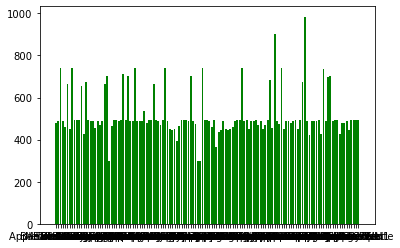

In [74]:
# creates a bar graph comparing the number of images in each category
plt.bar(list(train_image_count.keys()), train_image_count.values(), color='g')

# shows the bar graph
plt.show()

In [75]:
# more imports
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [76]:
# converts images into pytorch tensors
dataset = ImageFolder(data_dir+'/Training', transform=ToTensor())

In [77]:
# gets image and label of the first image in the dataset
img, label = dataset[0]

# prints the image shape and label
print(img.shape, label)

# prints the tensor and the image label
img, dataset.classes[label]

torch.Size([3, 100, 100]) 0


(tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [78]:
# defines function to show image and label of an item in the dataset
def show_img(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Apple Braeburn (0)


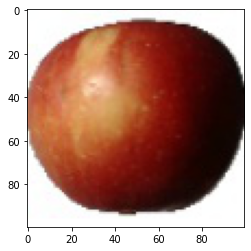

In [79]:
# passes in image and label for first item in the dataset
show_img(*dataset[0])

Label:  Physalis (97)


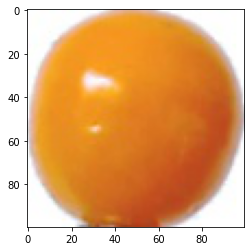

In [80]:
# passes in image and label for 50000th item in the dataset
show_img(*dataset[50000])

In [81]:
# initializes seed value to ensure the same validation set every time
random_seed = 50

# sets the seed
torch.manual_seed(random_seed)

# prints the length of the dataset
len(dataset)

67692

In [82]:
# takes 5% of the data for validation
val_percent = 0.05

# calculates validation size
val_size = int(val_percent*len(dataset))

# calculates train size
train_size = len(dataset) - val_size

# splits dataset into train_ds and val_ds
train_ds, val_ds = random_split(dataset, [train_size, val_size])

# prints length of train_ds and val_ds
len(train_ds), len(val_ds)

(64308, 3384)

In [83]:
# more imports
from torch.utils.data.dataloader import DataLoader

# initializes batch size
batch_size=128

In [84]:
# initializes train and validation dataloaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [85]:
# more imports
from torchvision.utils import make_grid

# defines function to show all images in a batch
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

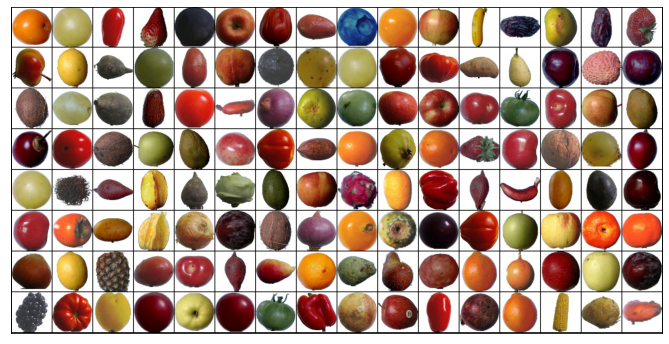

In [86]:
# passes train dataloader set into show_batch to show all items stored in the variable
show_batch(train_dl)

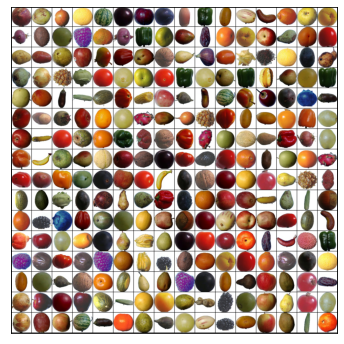

In [87]:
# passes validation dataloader set into show_batch to show all items stored in the variable
show_batch(val_dl)

In [23]:
# defines function to return accuracy of batch
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# initializes class for training steps
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # generate predictions
        loss = F.cross_entropy(out, labels) # calculate loss
        return loss
      
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # generate predictions
        loss = F.cross_entropy(out, labels)   # calculate loss
        acc = accuracy(out, labels)           # calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [24]:
# initializes class for CNN based model
class Fruits360CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 50 x 50

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 25 x 25

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),#output :256*25*25
            nn.MaxPool2d(5, 5), # output: 256 x 5 x 5

            nn.Flatten(), 
            nn.Linear(256*5*5, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 131))
               
    def forward(self, xb):
        return self.network(xb)

In [25]:
# defines variable model as an object of the cnn model
model = Fruits360CnnModel()

# prints model
model

Fruits360CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=6400, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_fe

In [26]:
# prints image shape, shape after being passed into cnn model, and first tensor
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 100, 100])


/Users/lilymeng/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


out.shape: torch.Size([128, 131])
out[0]: tensor([ 0.0503,  0.0461,  0.0075, -0.0057,  0.0266,  0.0371,  0.0169,  0.0003,
        -0.0115, -0.0032, -0.0255, -0.0362, -0.0301, -0.0125,  0.0066,  0.0194,
        -0.0017, -0.0098,  0.0089,  0.0296,  0.0151, -0.0329, -0.0395,  0.0300,
        -0.0068,  0.0034, -0.0204,  0.0450,  0.0224, -0.0447,  0.0233,  0.0087,
         0.0110,  0.0349,  0.0435,  0.0272,  0.0291, -0.0263,  0.0304, -0.0025,
         0.0177,  0.0238,  0.0443,  0.0277, -0.0123,  0.0243, -0.0332,  0.0315,
        -0.0099,  0.0179, -0.0118,  0.0321,  0.0257, -0.0374,  0.0315, -0.0265,
         0.0257, -0.0022,  0.0318,  0.0488,  0.0257, -0.0146,  0.0431, -0.0259,
        -0.0107, -0.0033, -0.0333,  0.0223,  0.0371, -0.0036, -0.0260, -0.0291,
        -0.0375, -0.0094, -0.0543,  0.0367, -0.0339,  0.0277,  0.0379,  0.0113,
         0.0546, -0.0200, -0.0276,  0.0380, -0.0105,  0.0349, -0.0223,  0.0193,
        -0.0062, -0.0121, -0.0337, -0.0361, -0.0217, -0.0081,  0.0507, -0.0310

In [27]:
# trains model on cpu if available (for faster training)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# defines class to transfer batches of data to cpu if available
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [28]:
# calls function that returns where the model is being trained 
device = get_default_device()

# prints where the model is being trained
device

device(type='cpu')

In [29]:
# train_dl is an object of DeviceDataLoader, transfering train_dl batch to be trained on cpu
train_dl = DeviceDataLoader(train_dl, device)

# val_dl is an object of DeviceDataLoader, transfering val_dl batch to be trained on cpu
val_dl = DeviceDataLoader(val_dl, device)

to_device(model, device)

Fruits360CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=6400, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_fe

In [30]:
@torch.no_grad()

# returns the validation losses and accuracy by passing a batch into class method validation_epoch_end
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

# function to train modal, calculates losses and accuracy for each epoch (cycle/batch) and adjusts weights depending on previous epoch with optimizer
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [31]:
# tests current model before training 
model = to_device(Fruits360CnnModel(), device)

In [32]:
# prints current losses and accuracy - less than 1% accuracy
evaluate(model, val_dl)

{'val_loss': 4.875301361083984, 'val_acc': 0.0078125}

In [33]:
# initializes number of epoches
num_epochs = 3

# initializes adam optimizer 
opt_func = torch.optim.Adam

# initializing learning rate for adjusting weights
lr = 0.001

In [35]:
# training model with training dataset - this took FIFTEEN (15) HOURS
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.7160, val_loss: 0.1872, val_acc: 0.9366
Epoch [1], train_loss: 0.1036, val_loss: 0.0971, val_acc: 0.9691
Epoch [2], train_loss: 0.0507, val_loss: 0.0140, val_acc: 0.9958


In [43]:
# initializes function to plot accurracy over each epoch
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

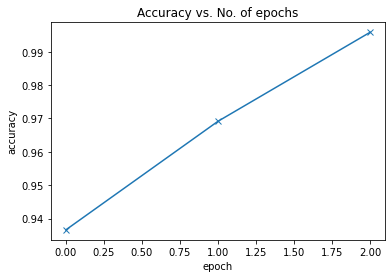

In [44]:
# plots accuracy over each epoch
plot_accuracies(history)

In [46]:
# initializes function to plot losses over each epoch
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')

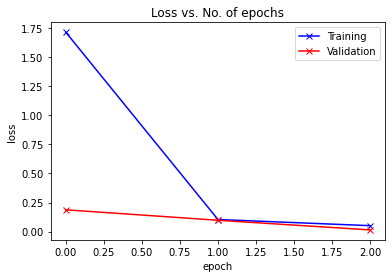

In [47]:
# plots losses over each epoch
plot_losses(history)

In [48]:
# initializes test dataset to test the trained model
test_dataset = ImageFolder(data_dir+'/Test', transform=ToTensor())

In [49]:
# initializes function to predict images using the trained model
def predict_image(img, model):
    # convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # get predictions from model
    yb = model(xb)
    # pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # retrieve the class label
    return dataset.classes[preds[0].item()]

Label: Apple Braeburn , Predicted: Apple Braeburn


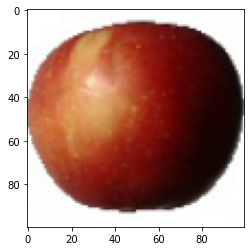

In [50]:
# separates the image and label for the first item in the test dataset
img, label = test_dataset[0]

# shows the image
plt.imshow(img.permute(1, 2, 0))

# prints the actual label and the predicted label using the trained model
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Cantaloupe 1 , Predicted: Cantaloupe 1


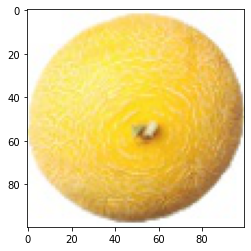

In [58]:
# separates the image and label for the 3652nd item in the test dataset
img, label = test_dataset[3652]

# shows the image
plt.imshow(img.permute(1, 2, 0))

# prints the actual label and the predicted label using the trained model
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Grape White 3 , Predicted: Grape White 3


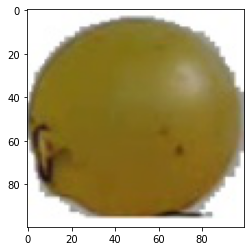

In [62]:
# separates the image and label for the 8157th item in the test dataset
img, label = test_dataset[8157]

# shows the image
plt.imshow(img.permute(1, 2, 0))

# prints the actual label and the predicted label using the trained model
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [63]:
# initializes test dataset to be tested on cpu if available
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)

# evaluates test dataset against trained model - about 30 minutes
result = evaluate(model, test_loader)

# prints results, losses and accuracy
result

{'val_loss': 0.5295957326889038, 'val_acc': 0.9005881547927856}

In [64]:
# saves model
torch.save(model.state_dict(), 'fora-model.pth')

In [66]:
# loads saved model
model2 = to_device(Fruits360CnnModel(), device)
model2.load_state_dict(torch.load('fora-model.pth'))

<All keys matched successfully>

In [67]:
# retests loaded model for losses and accuracy rates to make sure the saved model has been properly saved - about 30 minutes
evaluate(model2, test_loader)

{'val_loss': 0.5295957326889038, 'val_acc': 0.9005881547927856}